In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



### Data Exploration

In [31]:
df = pd.read_csv('kc_house_data.csv')

In [32]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [33]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [35]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Data Preprocessing

In [36]:
df['date'] = pd.to_datetime(df['date'])
df['age'] = 2025 -  df['yr_built']
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df["quartile"] = df["date"].dt.quarter
df['day'] = df['date'].dt.day
df['pct_living'] = df["sqft_living"] / (df["sqft_living"] + df["sqft_lot"])
df["total_rooms"] = df["bathrooms"] + df["bedrooms"]
df["price_per_sqft"] = df["price"] / df["sqft_living"]


In [37]:
df.drop_duplicates(inplace=True)

In [38]:
df.shape

(21613, 29)

In [42]:
df.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
age               0
year              0
month             0
quartile          0
day               0
pct_living        0
total_rooms       0
price_per_sqft    0
dtype: int64

In [40]:
df.shape

(21613, 29)

In [44]:
print(df.isnull().sum())

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
age               0
year              0
month             0
quartile          0
day               0
pct_living        0
total_rooms       0
price_per_sqft    0
dtype: int64


### Outliers Handling

In [46]:
Q1 = np.percentile(df['price'],25)
Q3 = np.percentile(df['price'],75)
IQR = Q3 -Q1
print("IQR",IQR)


IQR 323050.0


In [47]:
lower = Q1 - 1.5 * IQR
upper = Q1 + 1.5 * IQR

In [54]:
filtered_df = df[(df['price'] > lower) & (df['price'] < upper)]
filtered_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_living15,sqft_lot15,age,year,month,quartile,day,pct_living,total_rooms,price_per_sqft
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1340,5650,70,2014,10,4,13,0.172767,4.00,188.050847
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1690,7639,74,2014,12,4,9,0.261924,5.25,209.338521
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,2720,8062,92,2015,2,1,25,0.071495,3.00,233.766234
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1360,5000,60,2014,12,4,9,0.281609,7.00,308.163265
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1800,7503,38,2015,2,1,18,0.172131,5.00,303.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,1509,16,2014,5,2,21,0.574972,5.50,235.294118
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,1830,7200,11,2015,2,1,23,0.284378,6.50,173.160173
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,2007,16,2014,6,2,23,0.430380,2.75,394.216667
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,1410,1287,21,2015,1,1,16,0.401204,5.50,250.000000


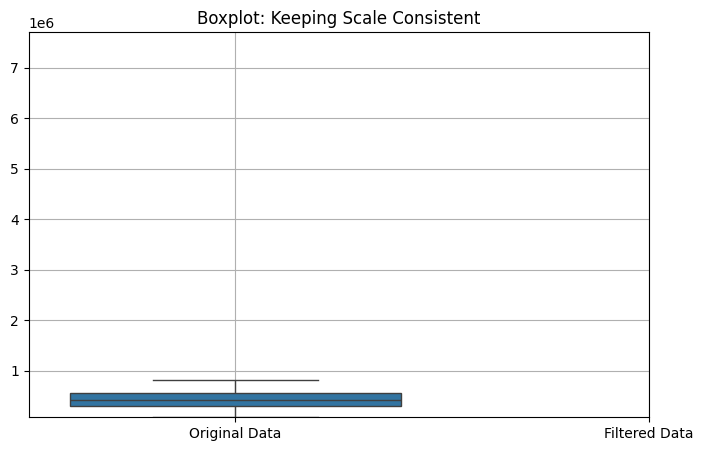

In [69]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=[df['price'], filtered_df['price']])
plt.xticks([0, 1], ['Original Data', 'Filtered Data'])
plt.ylim(min(df['price']) - 10, max(df['price']) + 10)  # Keep the same scale
plt.title("Boxplot: Keeping Scale Consistent")
plt.grid()

plt.show()

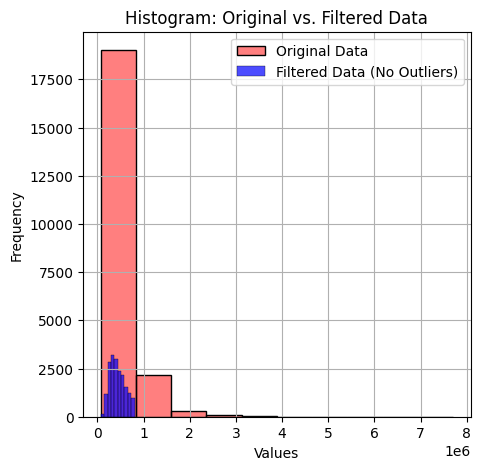

In [62]:
plt.figure(figsize=(5, 5))

# Plot original data
sns.histplot(df['price'], bins=10, color='red', alpha=0.5, label="Original Data")

# Plot filtered data
sns.histplot(filtered_df['price'], bins=10, color='blue', alpha=0.7, label="Filtered Data (No Outliers)")

plt.legend()
plt.title("Histogram: Original vs. Filtered Data")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.grid()

plt.show()

ValueError: x and y must be the same size

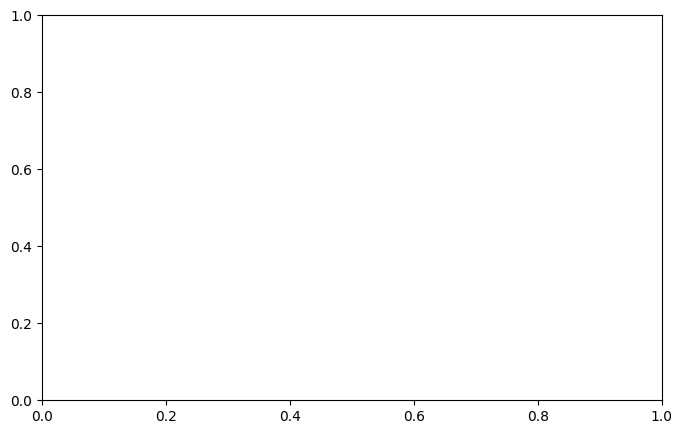

In [27]:
remove_columns = ['id','zipcode','lat','long','date']

data = df.drop(remove_columns, axis=1)
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,age,year,month,day,pct_living
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,1340,5650,70,2014,10,13,0.172767
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,1690,7639,74,2014,12,9,0.261924
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,2720,8062,92,2015,2,25,0.071495
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,1360,5000,60,2014,12,9,0.281609
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,1800,7503,38,2015,2,18,0.172131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,0,2009,0,1530,1509,16,2014,5,21,0.574972
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,0,2014,0,1830,7200,11,2015,2,23,0.284378
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,0,2009,0,1020,2007,16,2014,6,23,0.430380
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,0,2004,0,1410,1287,21,2015,1,16,0.401204


In [28]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,age,year,month,day,pct_living
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,1340,5650,70,2014,10,13,0.172767
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,1690,7639,74,2014,12,9,0.261924
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,2720,8062,92,2015,2,25,0.071495
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,1360,5000,60,2014,12,9,0.281609
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,1800,7503,38,2015,2,18,0.172131


In [32]:
X = data.drop('price', axis=1)
y = data['price']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  
y_scaled = scaler.fit_transform(y.values.reshape(-1,1)).flatten()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [33]:
class LinearRegression():
    def __init__(self,learning_rate, n_iter) -> None:
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None
        self.cost_history = []

    
    def _mean_squared_error(self, y_true, y_predicted):
        return np.mean((y_true - y_predicted)**2)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        self.weights = np.zeros(n_features)
        self.bias =0 

        for _ in range(self.n_iter):
            y_predicted = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            cost = self._mean_squared_error(y, y_predicted)
            self.cost_history.append(cost)


    
    def predict(self, X):
         return np.dot(X, self.weights) + self.bias

    def get_params(self):
        return self.weights, self.bias

model = LinearRegression(learning_rate=0.01, n_iter=100)






In [34]:
model.fit(X_train, y_train)

In [35]:
y_pred = model.predict(X_test)

In [36]:
from sklearn.metrics import mean_squared_error


In [37]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.41969125974704274


In [38]:
df.to_csv('cleaned_data.csv', index=False)